In [53]:
# importing modules and relevant data set

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
import os

df = pd.read_excel(open('auction.xlsx', 'rb'),sheet_name='raw')
auctions_df = pd.read_excel(open('auction.xlsx', 'rb'),sheet_name='auctions')

##### Taking a look at total unique values in each attribute

In [18]:
df.nunique()

auctionid         628
bid              1858
bidtime         10400
bidder           3387
bidderrate        301
openbid           109
price             318
item                3
auction_type        3
dtype: int64

#### Overview of auctions dataset

In [55]:
auctions_df.head()

,index,auctionid,bid_count,opening_price,closing_price,profit,profit(%),item,auction_type
0,0,1638843936,7,500.0,1625.0,1125.0,325.000000,Cartier wristwatch,7 day auction
1,1,1638844284,2,200.0,500.0,300.0,250.000000,Cartier wristwatch,7 day auction
2,2,1638844464,16,300.0,740.0,440.0,246.666667,Cartier wristwatch,7 day auction
3,3,1638844729,11,225.0,320.0,95.0,142.222222,Cartier wristwatch,7 day auction
4,4,1638893549,5,99.0,177.5,78.5,179.292929,Cartier wristwatch,3 day auction


In [81]:
auctions_df.describe()

,index,auctionid,bid_count,opening_price,closing_price,profit,profit(%)
count,628.000000,6.280000e+02,628.000000,628.000000,628.000000,628.000000,6.280000e+02
mean,313.500000,3.955072e+09,17.007962,109.344658,347.860127,238.515469,2.908636e+05
std,181.432265,2.438180e+09,10.885877,286.581580,481.398632,369.458188,9.616792e+05
min,0.000000,1.638844e+09,1.000000,0.010000,26.000000,0.000000,1.000000e+02
25%,156.750000,3.014747e+09,8.000000,1.000000,186.132500,54.877500,1.543523e+02
50%,313.500000,3.020237e+09,16.000000,24.745000,227.500000,179.750000,7.562800e+02
75%,470.250000,3.025793e+09,24.000000,150.000000,255.002500,238.002500,2.189375e+04
max,627.000000,8.215611e+09,75.000000,5000.000000,5400.000000,3102.000000,1.600000e+07


##### More insight is obtained by sectioning into different auction types and item to see the individual performances of different types of items in different types of auction

In [113]:
auctions_visualize = auctions_df.groupby(['auction_type', 'item'])[['bid_count', 'opening_price', 
                                                                    'closing_price', 'profit', 'profit(%)']].mean()
auctions_visualize

bid_count  opening_price  closing_price  \
auction_type  item                                                           
3 day auction Cartier wristwatch   13.888889     189.719444     630.856667   
              Palm Pilot M515 PDA  12.800000     113.110000     223.085895   
              Xbox game console    15.914286      43.008857     118.426571   
5 day auction Cartier wristwatch   16.904762     309.283333     864.079048   
              Palm Pilot M515 PDA  16.092593      98.481296     229.873148   
              Xbox game console    18.714286      46.905238     139.052381   
7 day auction Cartier wristwatch   13.896907     272.215670     936.069278   
              Palm Pilot M515 PDA  19.752577      53.771368     231.800825   
              Xbox game console    20.010753      36.217419     134.576989   

                                       profit  profit(%)  
auction_type  item                                        
3 day auction Cartier wristwatch   441.137222   6.053008  
              Palm Pilot M515 PDA  109.975895   6.978995  
              Xbox game console     75.417714   7.109878  
5 day auction Cartier wristwatch   554.795714   7.704356  
              Palm Pilot M515 PDA  131.391852   7.058194  
              Xbox game console     92.147143   7.150682  
7 day auction Cartier wristwatch   663.853608   7.815621  
              Palm Pilot M515 PDA  178.029457   9.147154  
              Xbox game console     98.359570   7.129981

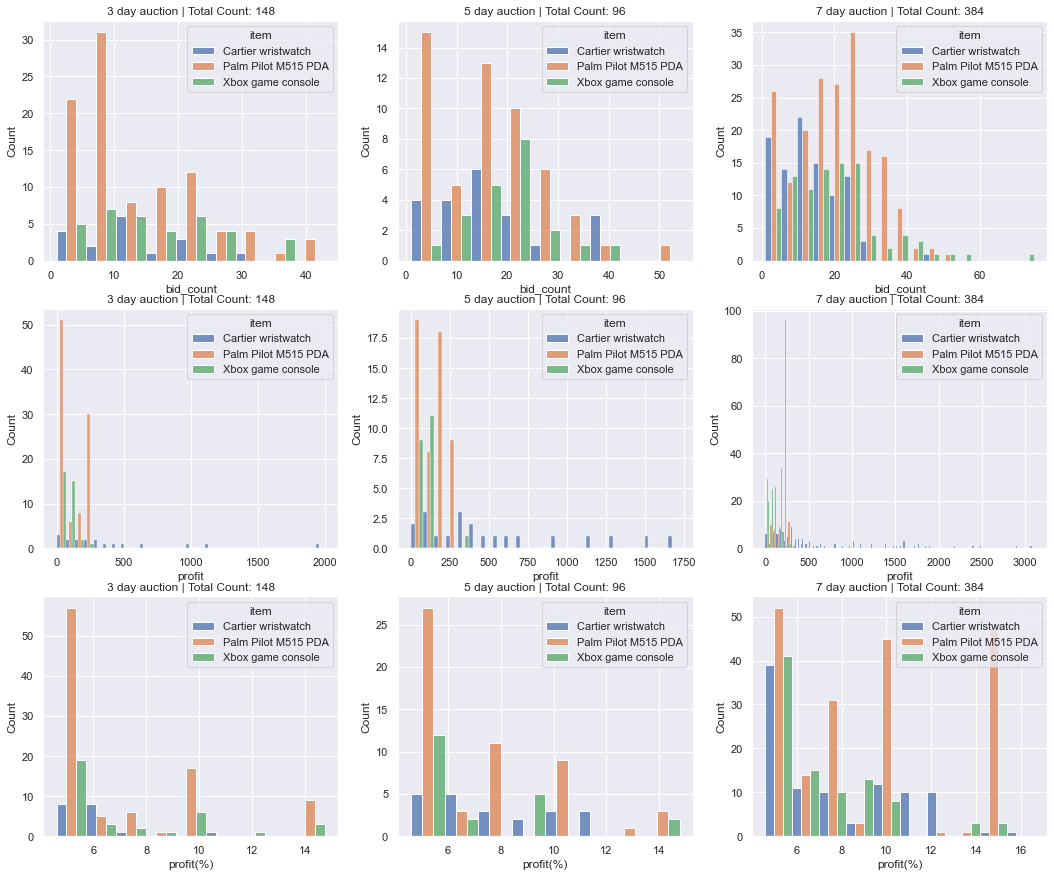

In [123]:
f, ax = plt.subplots(3, 3, figsize=(18, 15))

def chart_auctions(auction_type_input, select_value, axes_input):
    sns.histplot(
        data = auctions_df[auctions_df.auction_type == auction_type_input],
        x = select_value,
        hue = 'item',
        multiple = 'dodge',
        ax = axes_input
    )
    axes_input.set_title(auction_type_input + ' | Total Count: ' + str(auctions_df[auctions_df.auction_type == auction_type_input].shape[0]))
    axes_input.set_label('test')
    
chart_auctions('3 day auction', 'bid_count', ax[0, 0])
chart_auctions('5 day auction', 'bid_count', ax[0, 1])
chart_auctions('7 day auction', 'bid_count', ax[0, 2])
chart_auctions('3 day auction', 'profit', ax[1, 0])
chart_auctions('5 day auction', 'profit', ax[1, 1])
chart_auctions('7 day auction', 'profit', ax[1, 2])
chart_auctions('3 day auction', 'profit(%)', ax[2, 0])
chart_auctions('5 day auction', 'profit(%)', ax[2, 1])
chart_auctions('7 day auction', 'profit(%)', ax[2, 2])

###### Findings:
- Palm Pilot is the most popular product
- Palm Pilot performs significantly better in 7 day auctions (May be misleading due to listing at 0.01, inflated by quantity which provides the illusion of better returns)

In [95]:
auctions_df['profit(%)'] = np.log(auctions_df['profit(%)'])

In [96]:
auctions_df

,index,auctionid,bid_count,opening_price,closing_price,profit,profit(%),item,auction_type
0,0,1638843936,7,500.00,1625.00,1125.00,5.783825,Cartier wristwatch,7 day auction
1,1,1638844284,2,200.00,500.00,300.00,5.521461,Cartier wristwatch,7 day auction
2,2,1638844464,16,300.00,740.00,440.00,5.508038,Cartier wristwatch,7 day auction
3,3,1638844729,11,225.00,320.00,95.00,4.957391,Cartier wristwatch,7 day auction
4,4,1638893549,5,99.00,177.50,78.50,5.189021,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
623,623,8215558653,14,55.00,135.29,80.29,5.505258,Xbox game console,3 day auction
624,624,8215571039,20,50.00,150.00,100.00,5.703782,Xbox game console,3 day auction
625,625,8215582227,16,60.00,152.50,92.50,5.537990,Xbox game console,3 day auction
626,626,8215605488,11,0.99,61.00,60.01,8.726094,Xbox game console,3 day auction


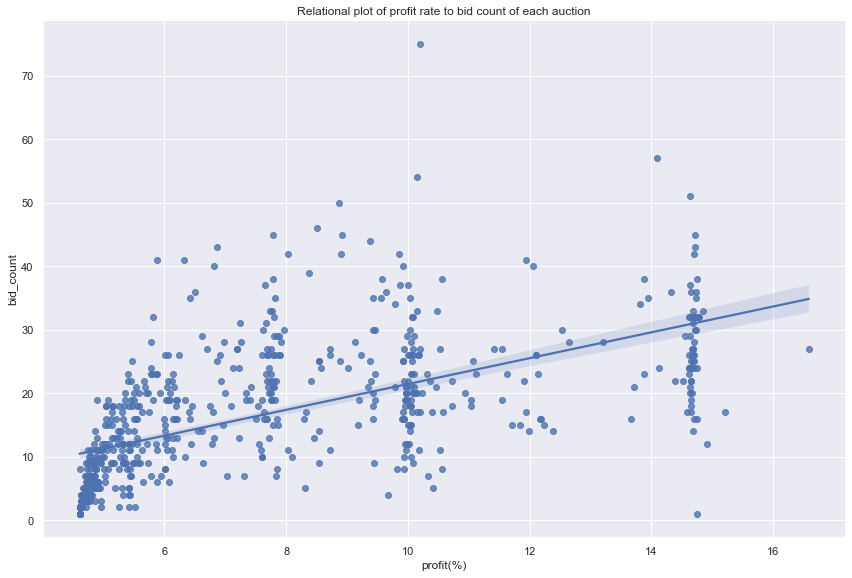

In [122]:
g = sns.lmplot(
    data = auctions_df,
    x = 'profit(%)',
    y = 'bid_count',
    height = 8,
    aspect = 1.5
)
g.set(title='Relational plot of profit rate to bid count of each auction')
plt.show()

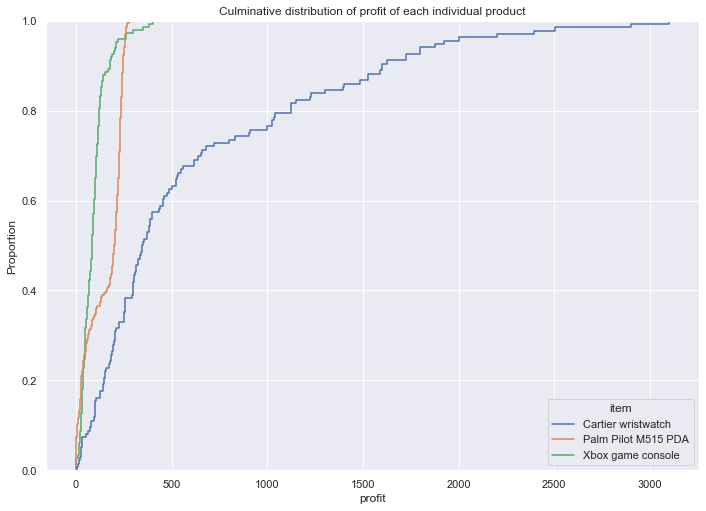

In [124]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.ecdfplot(
    data = auctions_df,
    hue = 'item',
    x = 'profit'
)

g.set(title='Culminative distribution of profit of each individual product')
plt.show()

###### Findings:
- Cartier wristwatch has the most profit potential

###### TODO: 
- Time trend for different types of auctions to figure out if there is a trend of a 'spike' nearing the end of auctions